<a href="https://colab.research.google.com/github/hongkuntian/comp551-applied-machine-learning/blob/master/project1/miniproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 timport pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.set(style='whitegrid', palette="deep", font_scale=0.8)

SEED = 551  # Arbitraty seed used for random operations

# Data

Set URLs for datasets on github

In [0]:
iono_url = 'https://raw.githubusercontent.com/hongkuntian/comp551-applied-machine-learning/master/project1/data/ionosphere.data'
adult_url_data = 'https://raw.githubusercontent.com/hongkuntian/comp551-applied-machine-learning/master/project1/data/adult.data'
adult_url_test = 'https://raw.githubusercontent.com/hongkuntian/comp551-applied-machine-learning/master/project1/data/adult.test'
mushroom_url = 'https://raw.githubusercontent.com/hongkuntian/comp551-applied-machine-learning/master/project1/data/agaricus-lepiota.data'
bank_url = 'https://raw.githubusercontent.com/hongkuntian/comp551-applied-machine-learning/master/project1/data/bank-additional-full.data'
# need 2 more

Define column names

In [0]:
iono_header = None
adult_header = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class']

Import data

In [0]:
df_iono = pd.read_csv(iono_url, header=None)

df_adult_1 = pd.read_csv(adult_url_data, names=adult_header)
df_adult_2 = pd.read_csv(adult_url_test, comment='|', names=adult_header)
df_adult = pd.concat([df_adult_1, df_adult_2], axis=0).reset_index(drop=True)



## Helper functions


In [0]:
def split_training_test(df, class_feature, train_frac=0.8):
  train = df.sample(frac=train_frac, random_state=SEED)
  test = df.drop(train.index)
  print("Training data class distribution:")
  print((train[class_feature].value_counts() / train.shape[0]).head())
  print("Test data class distribution:")
  print((test[class_feature].value_counts() / test.shape[0]).head())
  X_train = train.drop(class_feature, axis=1)
  y_train = train[class_feature]
  X_test = test.drop(class_feature, axis=1)
  y_test = test[class_feature]
  return X_train.values, y_train.values.reshape(-1,1), X_test.values, y_test.values.reshape(-1,1)

  # K-fold, different function

In [0]:
# train, test = split_training_test(df_adult, 'class')

## Ionosphere dataset

In [0]:
df_iono.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [0]:
df_iono.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
0     351 non-null int64
1     351 non-null int64
2     351 non-null float64
3     351 non-null float64
4     351 non-null float64
5     351 non-null float64
6     351 non-null float64
7     351 non-null float64
8     351 non-null float64
9     351 non-null float64
10    351 non-null float64
11    351 non-null float64
12    351 non-null float64
13    351 non-null float64
14    351 non-null float64
15    351 non-null float64
16    351 non-null float64
17    351 non-null float64
18    351 non-null float64
19    351 non-null float64
20    351 non-null float64
21    351 non-null float64
22    351 non-null float64
23    351 non-null float64
24    351 non-null float64
25    351 non-null float64
26    351 non-null float64
27    351 non-null float64
28    351 non-null float64
29    351 non-null float64
30    351 non-null float64
31    351 non-null float64
32    351 non-null float64
33    35

In [0]:
print('Shape:', df_iono.shape)
print('NaN values:')
print(len(df_iono) - df_iono.count())

Shape: (351, 35)
NaN values:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
dtype: int64


In [0]:
df_iono.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


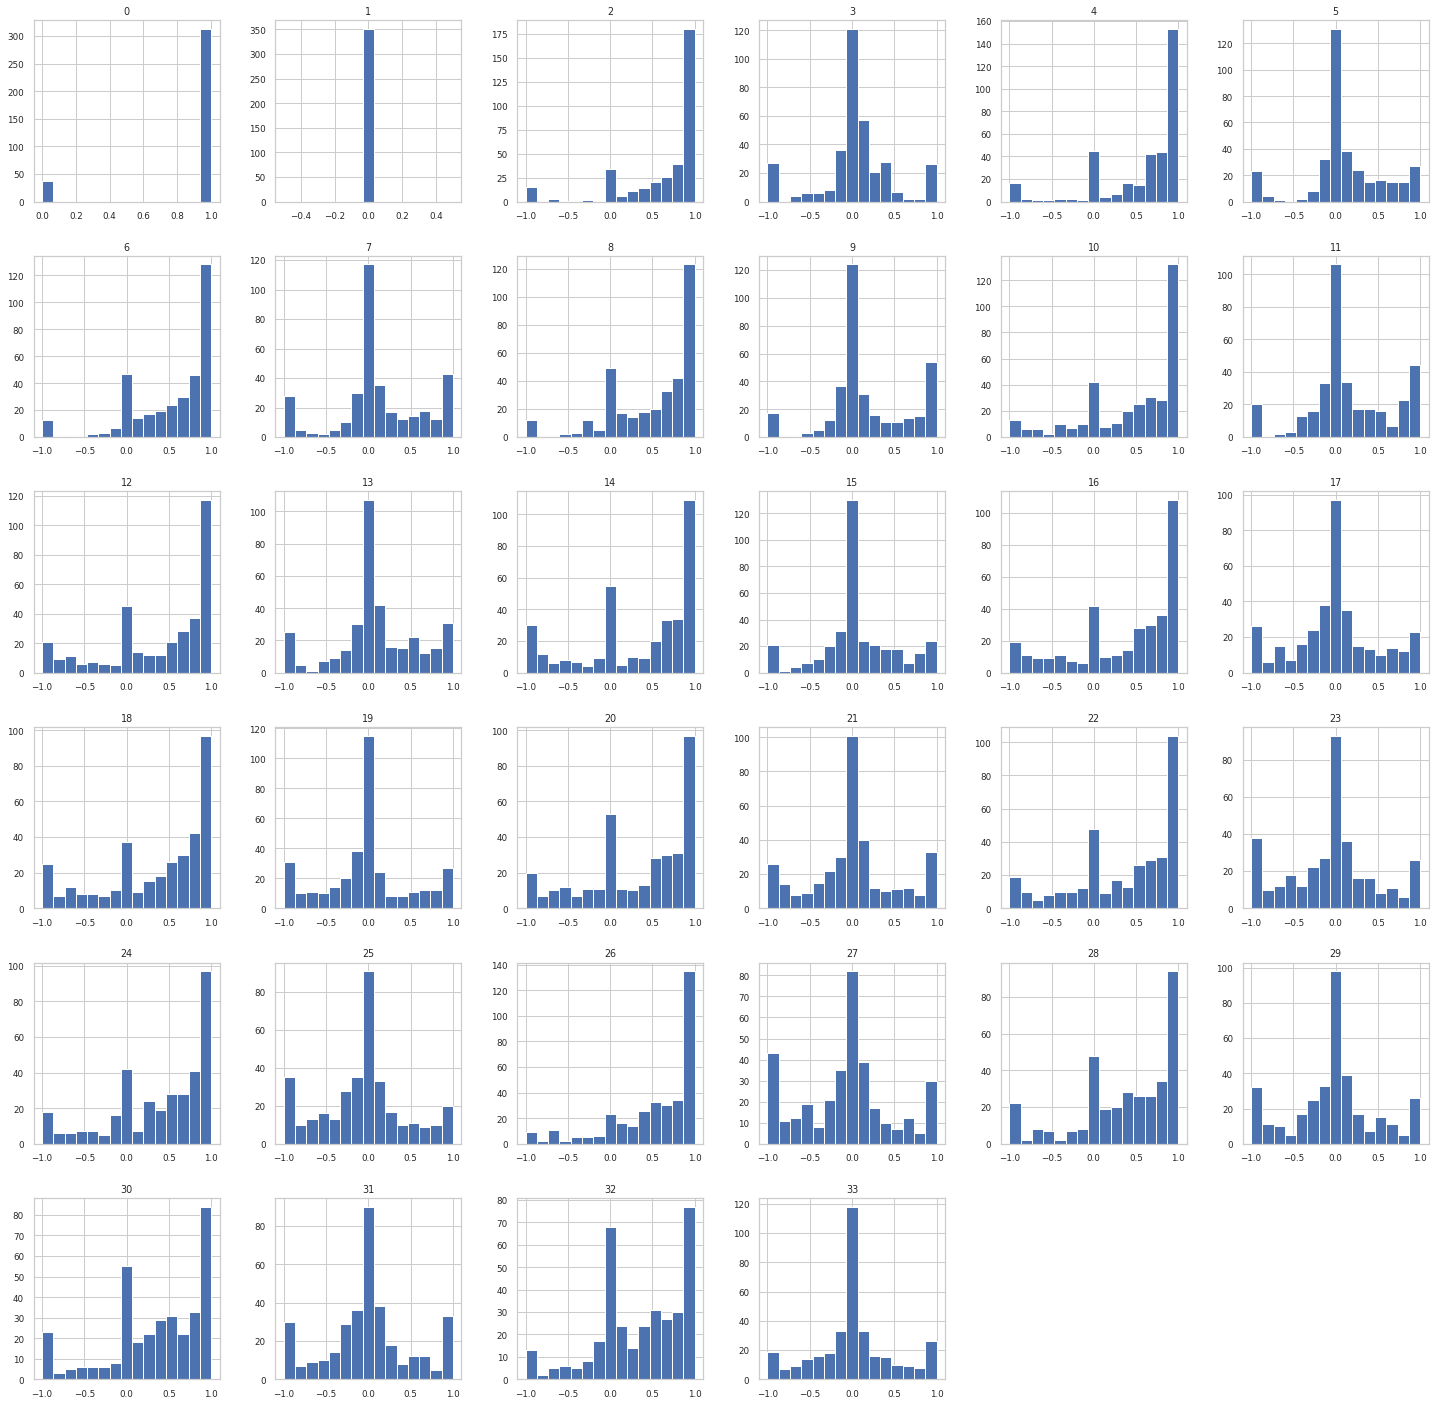

In [0]:
df_iono[:].hist(bins=15, figsize=(25,25), layout=(6,6));

In [0]:
print(df_iono[34].unique())

['g' 'b']


In [0]:
df_iono[34] = (df_iono[34].map({'g':0, 'b':1}))
df_iono.drop(1, axis=1, inplace=True)

## Adult dataset

In [0]:
df_adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
class             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Let us separate the preprocessing for numerical versus categorical features



In [0]:
numerical = [col for col in df_adult.select_dtypes(include=['int'])]
categorical = [col for col in df_adult.select_dtypes(include=['object'])]

Let us first check if there are missing values in the form of NaNs

In [0]:
print('Shape:', df_adult.shape)
print('NaN values:')
print(len(df_adult) - df_adult.count())

Shape: (48842, 15)
NaN values:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64


In [0]:
df_adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [74]:
df_adult['capital-gain'].value_counts()['99999']

KeyError: ignored

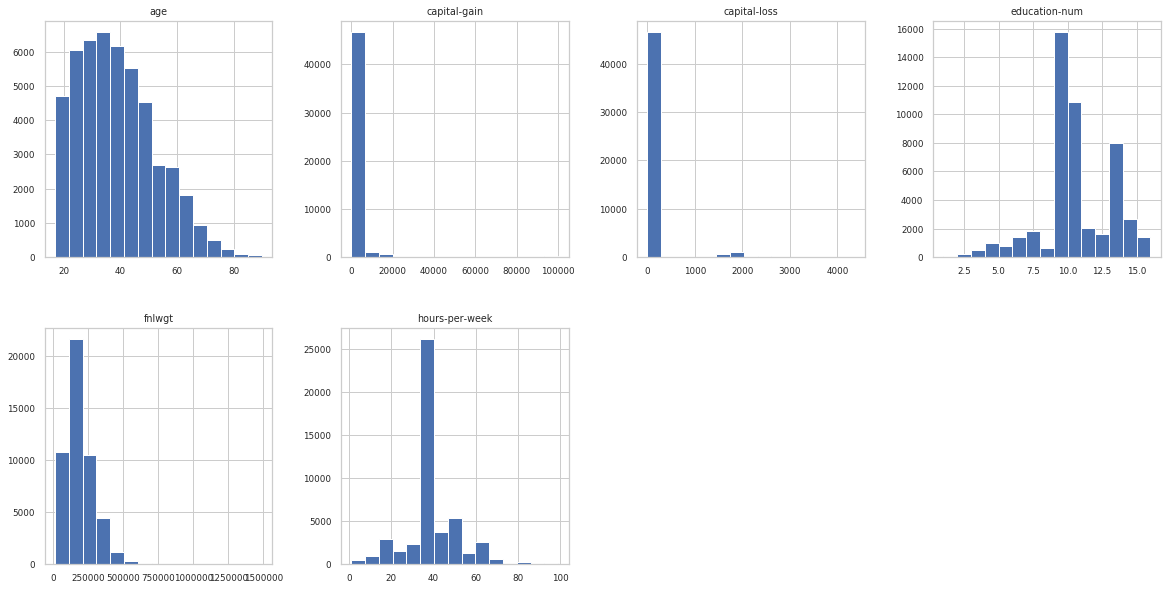

In [0]:
df_adult[numerical].hist(bins=15, figsize=(20,10), layout=(2,4));

It is pretty clear that 'capital-gain' and 'capital-loss' feature predominantly only one number: 0. Let us examine a little further to determine whether we should remove these features.

In [0]:
for feature in numerical:
  print((df_adult[feature].value_counts() / df_adult.shape[0]).head())

36    0.027599
35    0.027374
33    0.027333
23    0.027210
31    0.027128
Name: age, dtype: float64
203488    0.000430
120277    0.000389
190290    0.000389
125892    0.000369
126569    0.000369
Name: fnlwgt, dtype: float64
9     0.323164
10    0.222718
13    0.164305
14    0.054400
11    0.042197
Name: education-num, dtype: float64
0        0.917387
15024    0.010503
7688     0.008394
7298     0.007453
99999    0.004996
Name: capital-gain, dtype: float64
0       0.953278
1902    0.006224
1977    0.005180
1887    0.004770
2415    0.001474
Name: capital-loss, dtype: float64
40    0.466873
50    0.086933
45    0.055628
60    0.044572
35    0.039658
Name: hours-per-week, dtype: float64


These two features have abnormal distributions where over 90% of the data are identical. For this reason, we choose to ommit them since they may not be significantly predictive.

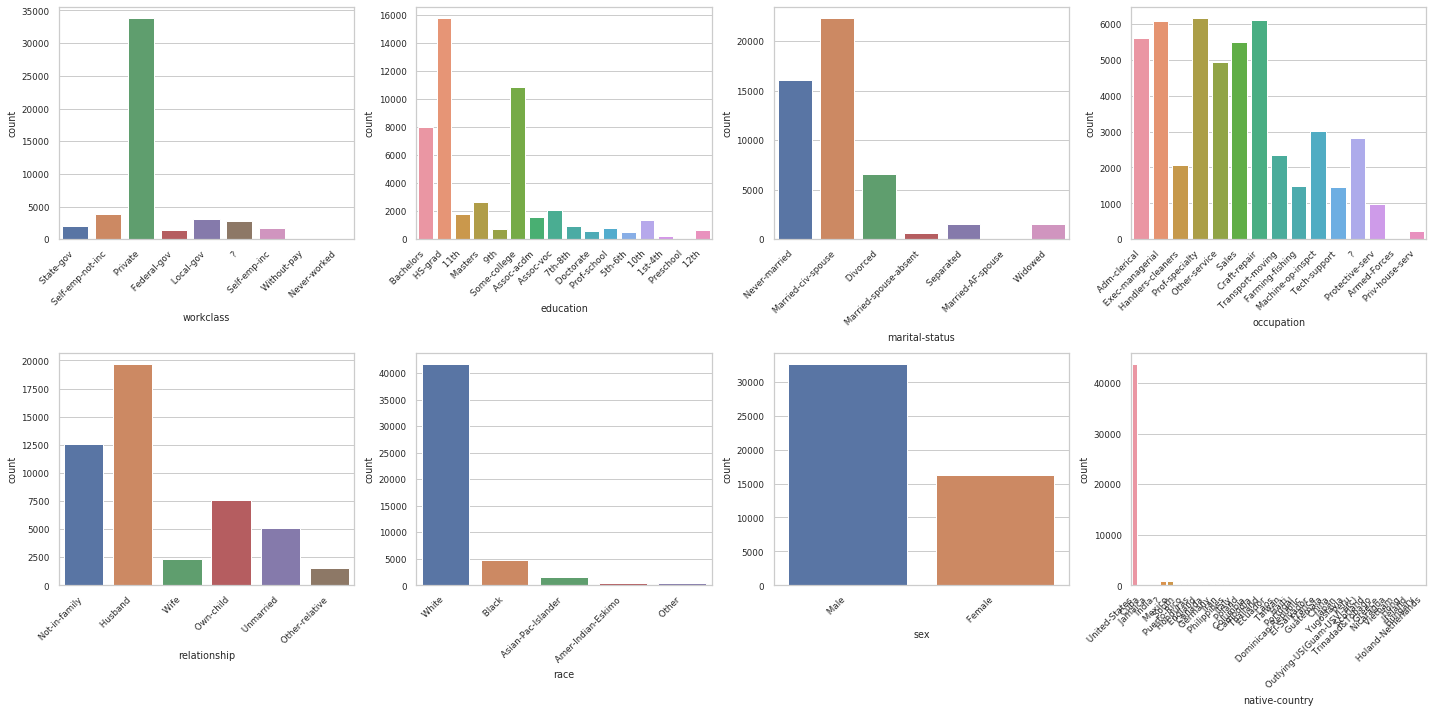

In [0]:
fig, axes = plt.subplots(2, 4, figsize=(20,10))
for feature, subplot in zip(categorical, axes.flatten()):
    # df_adult[categorical_feature].value_counts().plot(kind='bar', ax=axes[0 if i <= 4 else 1, i % 4]).set_title(categorical_feature)
    sns.countplot(df_adult[feature], ax=subplot)
    # p.set_xticklabels(axes[0 if i <= 4 else 1, i % 4].get_xticklabels(), rotation=45, horizontalalignment='right')
    for label in subplot.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
fig.tight_layout()

In [0]:
for feature in categorical:
  print(df_adult[feature].unique())
  print((df_adult[feature].value_counts() / df_adult.shape[0]).head())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             0.694198
 Self-emp-not-inc    0.079071
 Local-gov           0.064207
 ?                   0.057307
 State-gov           0.040559
Name: workclass, dtype: float64
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 HS-grad         0.323164
 Some-college    0.222718
 Bachelors       0.164305
 Masters         0.054400
 Assoc-voc       0.042197
Name: education, dtype: float64
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
 Married-civ-spouse    0.458192
 Never-married         0.329982
 Divorced              0.135805
 Separated             0.031325
 Widowed               0.031080
Name: marital-status, dtype: float64
[' Adm-clerical' ' Ex

We can notice that the class data has not been cleanly separated into the correct binary classes we need. We will address the typos and map the classes into a single column of 1s and 0s. 

Additionally, we can observe that 'workclass', 'occupation', and 'native-country' feature missing data in the form of a ' ?' string. Given that there aren't many of them, we choose to ommit instances where there are such missing data. 

Finally, the feature 'native-country' has the category ' United-States' more than 90% of the time. This is an abnormal distribution, so we choose to ommit the feature since it may not be particularly predictive of the class.



In [0]:
def get_continent(country):
  if country in [' Canada', ' Cuba', ' Dominican-Republic', ' El-Salvador', ' Guatemala', ' Haiti', ' Honduras', ' Jamaica', ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Puerto-Rico', ' Trinidad&Tobago', ' United-States']:
    return 'North-America'
  elif country in [' England', ' France', ' Germany', ' Greece', ' Holand-Netherlands', ' Hungary', ' Ireland', ' Italy', ' Poland', ' Portugal', ' Scotland', ' Yugoslavia']:
    return 'Europe'
  elif country in [' Cambodia', ' China', ' Hong', ' India', ' Iran', ' Japan', ' Laos', ' Philippines', ' Taiwan', ' Thailand', ' Vietnam']:
    return 'Asia'
  elif country in [' Columbia', ' Ecuador', ' Peru']:
    return 'South-America'
  else:
    return 'Unknown'

In [0]:
# df_adult.drop(['capital-gain','capital-loss'], axis=1, inplace=True)
# categorical.remove('native-country')
# df_adult['native-country'] = df_adult['native-country'].apply(get_continent)
df_adult['class'] = (df_adult['class'].map({' <=50K':0,' <=50K.':0,' >50K':1,' >50K.':1}))

for feature in categorical:
  df_adult[feature].replace(' ?', np.nan, inplace=True)

df_adult.dropna(inplace=True)

for feature in categorical:
  print(df_adult[feature].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Colu

In [0]:
(df_adult['class'].value_counts() / df_adult.shape[0]).head()

0    0.752156
1    0.247844
Name: class, dtype: float64

In [0]:
df_adult = pd.get_dummies(df_adult, drop_first=True)

In [0]:
df_adult = (df_adult - df_adult.min()) / (df_adult.max() - df_adult.min())

In [0]:
df_adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,...,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,...,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,0.295177,0.119332,0.607897,0.011014,0.020339,0.407531,0.247844,0.068551,0.736522,0.036398,0.083941,0.043032,0.000464,0.035801,0.012759,0.004909,0.009929,0.018199,0.014948,0.033324,0.043320,0.167396,0.012030,0.326898,0.055592,0.001592,0.017359,0.218898,0.000708,0.465592,0.012206,0.322807,0.031202,0.028238,0.000310,0.133121,0.132325,0.032727,0.045243,0.065676,...,0.003604,0.002499,0.001813,0.002941,0.002145,0.000951,0.003251,0.002631,0.000796,0.004268,0.001084,0.001902,0.001526,0.000022,0.000420,0.000619,0.000398,0.003251,0.001238,0.000796,0.002211,0.002278,0.001968,0.000464,0.019968,0.001061,0.000486,0.000995,0.006258,0.001791,0.001371,0.003870,0.000442,0.002233,0.001216,0.000641,0.000575,0.913095,0.001835,0.000509
std,0.181067,0.071527,0.170192,0.075065,0.092965,0.122526,0.431766,0.252691,0.440524,0.187281,0.277303,0.202932,0.021545,0.185796,0.112235,0.069894,0.099149,0.133672,0.121348,0.179484,0.203578,0.373334,0.109019,0.469085,0.229135,0.039870,0.130606,0.413504,0.026592,0.498820,0.109808,0.467555,0.173864,0.165655,0.017592,0.339709,0.338847,0.177924,0.207840

## Split into training and testing datasets

In [0]:
X_adult_train, y_adult_train, X_adult_test, y_adult_test = split_training_test(df_adult, 'class')
print()
X_iono_train, y_iono_train, X_iono_test, y_iono_test = split_training_test(df_iono, 34)

Training data class distribution:
0.0    0.752115
1.0    0.247885
Name: class, dtype: float64
Test data class distribution:
0.0    0.752322
1.0    0.247678
Name: class, dtype: float64

Training data class distribution:
0    0.640569
1    0.359431
Name: 34, dtype: float64
Test data class distribution:
0    0.642857
1    0.357143
Name: 34, dtype: float64


In [0]:
len(df_adult.columns)

97

# Models

## Logistic Regression

In [0]:
class LogisticRegression:
  def __init__(self, lr=0.01, eps=1e-2, max_iter=100000, add_intercept=True, verbose=False):
    self.lr = lr
    self.eps = eps
    self.max_iter = max_iter
    self.add_intercept = add_intercept
    self.verbose = verbose
    self.cost_history = []

  def __add_intercept(self, X):
    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)
    return X

  def __compute_cost( self,
                      w, # N
                      X, # N x D
                      y # N 
                    ):
    z = np.dot(X,w) #N x 1
    J = np.mean( y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)) ) 
    return J

  def __sigmoid(self, z):
    return 1.0 / (1 + np.exp(-z))

  def __gradient(self, X, y, w):
    N,D = X.shape
    yh = self.__sigmoid(np.dot(X, w))
    grad = np.dot(X.T, yh - y) / N 
    return grad

  def fit(self,
          X, # N x D
          y, # N
          ):
    if (self.add_intercept):
      X = self.__add_intercept(X)
    if (self.cost_history):
      self.cost_history.clear()
    N,D = X.shape
    self.w = np.zeros((D,1))
    g = np.inf
    i = 0
    while np.linalg.norm(g) > self.eps and i <= self.max_iter:
      if(self.verbose == True and i % 100 == 0):
        cost = self.__compute_cost(self.w, X, y)
        self.cost_history.append(cost)
        print(f'cost at step {i}: \t {cost} \t')
      g = self.__gradient(X, y, self.w)
      self.w = self.w - self.lr*g
      i += 1
    return self.w
  
  def predict(self, X, threshold=0.5):
    if (self.add_intercept):
      X = self.__add_intercept(X)
    return np.array(list(map(lambda x: [1.0] if x >= threshold else [0.0], (self.__sigmoid(np.dot(X,self.w))))))

In [0]:
log_reg = LogisticRegression(lr=0.02)

In [0]:
%time theta = log_reg.fit(X_adult_train, y_adult_train)

cost at step 0: 	 0.6931471805599453 	
cost at step 100: 	 0.5346753863235273 	
cost at step 200: 	 0.5032628532655484 	
cost at step 300: 	 0.48176449339768207 	
cost at step 400: 	 0.4659899555332827 	
cost at step 500: 	 0.454073267819763 	
cost at step 600: 	 0.4448295331926406 	
cost at step 700: 	 0.43748566064237066 	
cost at step 800: 	 0.43152559215136044 	
cost at step 900: 	 0.42659653803120984 	
cost at step 1000: 	 0.42245168275905604 	
cost at step 1100: 	 0.4189145647634538 	
cost at step 1200: 	 0.4158564679337197 	
cost at step 1300: 	 0.4131817610994527 	
cost at step 1400: 	 0.41081818978725343 	
cost at step 1500: 	 0.4087103173437329 	
cost at step 1600: 	 0.4068150094392162 	
cost at step 1700: 	 0.40509827010777344 	
cost at step 1800: 	 0.403532988153704 	
cost at step 1900: 	 0.4020973073548669 	
cost at step 2000: 	 0.40077343101425683 	
cost at step 2100: 	 0.3995467335182513 	
cost at step 2200: 	 0.3984050919564841 	
cost at step 2300: 	 0.39733837756048257

In [0]:
np.mean(log_reg.predict(X_adult_test) == y_adult_test)

0.8300530738611234

In [0]:
conf_mat = confusion_matrix(log_reg.predict(X_adult_test), y_adult_test)
conf_mat

array([[6321, 1054],
       [ 483, 1186]])

In [0]:
print("Accuracy:", (6314+1171)/(6314+1069+490+1171))
print("Recall:", 6314/(6314+490))
print("Precision:", 6314/(6314+1069))

Accuracy: 0.8276205218929678
Recall: 0.9279835390946503
Precision: 0.8552079100636597


## Naive Bayes

## K-Fold Cross Validation (stratified)

In [0]:
class KFold:
  def __init__(self, num_splits):
    self.num_splits = num_splits

  def get_splits(self, X, y):
    N = y.shape[0]
    index = N // self.num_splits
    print(index)
    X_trains = []
    y_trains = []
    X_tests = []
    y_tests = []
    for i in range(self.num_splits):
      X_tests.append(X[i*index : (i+1)*index,:])
      y_tests.append(y[i*index : (i+1)*index])
    for arr in X_tests:
      X_trains.append(np.delete(X, arr, 0))
    for arr in y_tests:
      y_trains.append(np.delete(y, arr, 0))
    print("trains")
    print("X")
    print(X_trains)
    print("y")
    print(y_trains)
    print("tests")
    print("X")
    print(X_tests)
    print("y")
    print(y_tests)
    return 1
    

In [121]:
X = np.array([[1, 2, 1, 1, 1, 1, 1, 1, 1], [3, 8, 1, 1, 1, 1, 1, 1, 1], [1, 2, 1, 1, 1, 1, 1, 1, 1], [3, 4, 1, 1, 1, 1, 1, 1, 1], [3, 8, 1, 6, 1, 1, 1, 1, 1], [3, 8, 1, 1, 1, 2, 1, 1, 1]])
y = np.array([0, 0, 1, 1, 0, 1])
print(X)
print(y)

[[1 2 1 1 1 1 1 1 1]
 [3 8 1 1 1 1 1 1 1]
 [1 2 1 1 1 1 1 1 1]
 [3 4 1 1 1 1 1 1 1]
 [3 8 1 6 1 1 1 1 1]
 [3 8 1 1 1 2 1 1 1]]
[0 0 1 1 0 1]


In [123]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=3) 

for train_index, test_index in kf.split(X):
      print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

Train: [2 3 4 5] Validation: [0 1]
Train: [0 1 4 5] Validation: [2 3]
Train: [0 1 2 3] Validation: [4 5]


# Analysis

# Testing grounds


In [0]:
print(df_adult.info())

In [0]:
df_adult['class'].unique()

In [0]:
df_adult['class'] = (df_adult['class'].map({' <=50K':0,' <=50K.':0,' >50K':1,' >50K.':1}))

In [0]:
len(df_adult.select_dtypes(include=['object']).columns)

In [0]:
df_iono.head()

In [0]:
df_iono_train, df_iono_test = split_training_test(df_iono, 34)